In [15]:
import numpy
import math
from matplotlib import pyplot

# Line segment source

## Generate meshgrid for pressure and velocity field 

In [16]:
N = 100                               # Number of points in each direction
x_start, x_end = -5, 7            # x-direction boundaries
y_start, y_end = -7, 7            # y-direction boundaries
x = numpy.linspace(x_start, x_end, N)    # computes a 1D-array for x
y = numpy.linspace(y_start, y_end, N)    # computes a 1D-array for y
X, Y = numpy.meshgrid(x, y)              # generates a mesh grid

## Line segment source integration

### Line source solution for pressure and velocity (Datta-Gupta, 2007)

\begin{equation}
P(x,y)=B{{Q}_{w}}=-\frac{70.60\mu }{h\sqrt{{{k}_{x}}{{k}_{y}}}}\ln \left\{ {{(x-{{x}_{w}})}^{2}}+\frac{{{k}_{x}}}{{{k}_{y}}}{{(y-{{y}_{w}})}^{2}} \right\}{{Q}_{w}}+{{P}_{avg}}
\end{equation}

\begin{equation}
\frac{\partial P}{\partial x}=u=\frac{0.8936}{h\phi }\sqrt{\frac{{{k}_{x}}}{{{k}_{y}}}}\sum\limits_{k=1}^{{{N}_{w}}}{{{Q}_{k}}}\frac{x-{{x}_{k}}}{{{\left( x-{{x}_{k}} \right)}^{2}}+\frac{{{k}_{x}}}{{{k}_{y}}}{{(y-{{y}_{k}})}^{2}}}
\end{equation}

\begin{equation}
\frac{\partial P}{\partial y}=v=\frac{0.8936}{h\phi }\sqrt{\frac{{{k}_{x}}}{{{k}_{y}}}}\sum\limits_{k=1}^{{{N}_{w}}}{{{Q}_{k}}}\frac{y-{{y}_{k}}}{{{\left( x-{{x}_{k}} \right)}^{2}}+\frac{{{k}_{x}}}{{{k}_{y}}}{{(y-{{y}_{k}})}^{2}}}
\end{equation}



### Local coordinate transformation

<img src="./resources/PanelLocal.png" width="300">
<center>Figure 1. Nomenclature of the boundary element in the local coordinates</center>

Based on the nomenclatures in Fig. 1, a boundary element could be determined as its start point (A), end point (B), length (lj) and inclination (αj). The coordinate transformation from global system to local system can be given as follows:

\begin{matrix}
   {x}'=x-{{x}_{A}} & {y}'=y-{{y}_{A}}  \\
\end{matrix}

Where (xA,yA) is the location of start point (point A in Fig. A-1) of a BE in global coordinate system. Trigonometric sine and cosine function for a BE could be determined from start point (A) and end point (B) of the boundary elements, which can be expressed as follows:

\begin{matrix}
   \sin {{\alpha }_{j}}=\frac{{{y}_{B}}-{{y}_{A}}}{{{l}_{j}}} & \cos {{\alpha }_{j}}=\frac{{{x}_{B}}-{{x}_{A}}}{{{l}_{j}}}  \\
\end{matrix}

In local coordinate system, line source are placed along the boundary element at a point (x’j,y’j). The location can be easily given as follows:

\begin{equation}
\begin{matrix}
   \begin{matrix}
   {{{{x}'}}_{j}}=t\cos {{\alpha }_{j}} & {{{{y}'}}_{j}}=t\sin {{\alpha }_{j}}  \\
\end{matrix} & 0\le t  \\
\end{matrix}\le {{l}_{j}}
\end{equation}





In [17]:
#coordinate transformation
origin_new_x=0            # A point in Fig 1
origin_new_y=0            

X_local=X-origin_new_x
Y_local=Y-origin_new_y

### Line segment source integration
Integrating the line source solution (Eqs. 3-4) from A to B over a length l, the velocity can be given as follows:

\begin{equation}
P({x}',{y}')=-\frac{70.60\mu }{h\sqrt{{{k}_{x}}{{k}_{y}}}}{{Q}_{w}}\int_{t=0}^{t={{l}_{j}}}{\ln \left\{ {{({x}'-t\cos {{\alpha }_{j}})}^{2}}+\frac{{{k}_{x}}}{{{k}_{y}}}{{({y}'-t\sin {{\alpha }_{j}})}^{2}} \right\}dt}
\end{equation}

\begin{equation}
u\left( {x}',{y}' \right)=\frac{0.8936}{h\phi }\sqrt{\frac{{{k}_{x}}}{{{k}_{y}}}}{{Q}_{j}}\int_{t=0}^{t={{l}_{j}}}{\frac{{x}'-t\cos {{\alpha }_{j}}}{{{\left( {x}'-t\cos {{\alpha }_{j}} \right)}^{2}}+\frac{{{k}_{x}}}{{{k}_{y}}}{{({y}'-t\sin {{\alpha }_{j}})}^{2}}}dt}
\end{equation}

\begin{equation}
v\left( {x}',{y}' \right)=\frac{0.8936}{h\phi }\sqrt{\frac{{{k}_{x}}}{{{k}_{y}}}}{{Q}_{j}}\int_{t=0}^{t={{l}_{j}}}{\frac{{y}'-t\sin {{\alpha }_{j}}}{{{\left( {x}'-t\cos {{\alpha }_{j}} \right)}^{2}}+\frac{{{k}_{x}}}{{{k}_{y}}}{{({y}'-t\sin {{\alpha }_{j}})}^{2}}}dt}
\end{equation}

The integrals can be rewritten as follows:

\begin{equation}
\left. P({x}',{y}')={{Q}_{w}}\frac{{{d}_{p}}}{a}\left[ b\ln ({{{{x}'}}^{2}}-2bt+a{{t}^{2}}+{{k}_{r}}{{{{y}'}}^{2}})-ta\ln \left\{ {{({x}'-t\cos {{\alpha }_{j}})}^{2}}+{{k}_{r}}{{({y}'-t\sin {{\alpha }_{t}})}^{2}} \right\}+2\sqrt{{{k}_{r}}}c\arctan \left( \frac{b-at}{\sqrt{{{k}_{r}}}c} \right) \right] \right|_{t=0}^{t={{l}_{j}}}
\end{equation}

\begin{equation}
\left. u\left( {x}',{y}' \right)={{Q}_{j}}\frac{{{d}_{v}}}{a}\left[ \cos {{\alpha }_{j}}\ln ({{{{x}'}}^{2}}-2bt+a{{t}^{2}}+{{k}_{r}}{{{{y}'}}^{2}})+2\sqrt{{{k}_{r}}}\sin {{\alpha }_{j}}\arctan (\frac{at-b}{\sqrt{{{k}_{r}}}c}) \right] \right|_{t=0}^{t={{l}_{j}}}
\end{equation}

\begin{equation}
v\left( {x}',{y}' \right)=\left. {{Q}_{j}}\frac{{{d}_{v}}}{a}\left[ \sin {{\alpha }_{j}}\ln ({{{{x}'}}^{2}}-2tb+a{{t}^{2}}+{{k}_{r}}{{{{y}'}}^{2}})+2\sqrt{\frac{1}{{{k}_{r}}}}\cos {{\alpha }_{j}}\arctan (\frac{b-at}{\sqrt{{{k}_{r}}}c}) \right] \right|_{t=0}^{t={{l}_{j}}}
\end{equation}

where,
\begin{equation}
a={{\cos }^{2}}{{\alpha }_{j}}+{{k}_{r}}{{\sin }^{2}}{{\alpha }_{j}}\end{equation}
\begin{equation}
b={x}'\cos {{\alpha }_{j}}+{y}'{{k}_{r}}\sin {{\alpha }_{j}}\end{equation}
\begin{equation}
c={y}'\cos {{\alpha }_{j}}-{x}'\sin {{\alpha }_{j}}\end{equation}
\begin{equation}
{{d}_{v}}=-\frac{0.4468}{h\phi }\sqrt{{{k}_{r}}}\begin{matrix}
   {} & {{d}_{p}}=\frac{70.60\mu }{h\sqrt{{{k}_{x}}{{k}_{y}}}}  \\
\end{matrix}\end{equation}
\begin{equation}
{{k}_{r}}={{k}_{x}}/{{k}_{y}}\end{equation}

## Code implementation

In [5]:
#More General method
Q = 2000    #strength of the source-sheet,stb/d
h=25.26        #thickness of local gridblock,ft
phi=0.2        #porosity 
kx=200         #pemerability in x direction,md
ky=200         #pemerability in y direction,md
kr=kx/ky       #pemerability ratio
miu=1          #viscosity,cp

#Line segment source parameters
L1=1                      #Line segment source length
alpha=30*numpy.pi/180     #Line segment angle from x direction, angle alpha in Fig.1

# computes the pressure-velcity field generated by the source-sheet
p_sheet1 = numpy.empty((N, N), dtype=float)
u_sheet1 = numpy.empty((N, N), dtype=float)
v_sheet1 = numpy.empty((N, N), dtype=float)
for i in range(N):
    for j in range(N):  
        a=math.cos(alpha)**2+kr*math.sin(alpha)**2
        b=X_local[i,j]*math.cos(alpha)+kr*math.sin(alpha)*Y_local[i,j]
        c=Y_local[i,j]*math.cos(alpha)-X_local[i,j]*math.sin(alpha)
        dp=70.6*Q*miu/h/math.sqrt(kx*ky)
        dv=-0.4468*Q/h/phi*math.sqrt(kx/ky)
        
        p_sheet1[i,j] = dp/a*(
                             (
                              b*math.log(X_local[i,j]**2-2*b*L1+a*L1**2+kr*Y_local[i,j]**2)
                             -L1*a*math.log((X_local[i,j]-L1*math.cos(alpha))**2+kr*(Y_local[i,j]-L1*math.sin(alpha))**2)
                             +2*math.sqrt(kr)*c*math.atan((b-a*L1)/math.sqrt(kr)/c)
                             )
                             -
                             (
                               b*math.log(X_local[i,j]**2+kr*Y_local[i,j]**2)
                               +2*math.sqrt(kr)*c*math.atan((b)/math.sqrt(kr)/c)
                             )         
                            )
        u_sheet1[i,j] = dv/a*(
                             ( 
                            math.cos(alpha)*math.log(X_local[i,j]**2-2*b*L1+a*L1**2+kr*Y_local[i,j]**2)+ 2*math.sqrt(kr)*math.sin(alpha)*math.atan((a*L1-b)/math.sqrt(kr)/c) 
                             )
                            -
                             (
                            math.cos(alpha)*math.log(X_local[i,j]**2+kr*Y_local[i,j]**2)+2*math.sqrt(kr)*math.sin(alpha)*math.atan((-b)/math.sqrt(kr)/c)
                             )    
                            )
        v_sheet1[i,j] = dv/a*(
                             ( 
                            math.sin(alpha)*math.log(X_local[i,j]**2-2*b*L1+a*L1**2+kr*Y_local[i,j]**2)+ 2*math.sqrt(1/kr)*math.cos(alpha)*math.atan((b-a*L1)/math.sqrt(kr)/c) 
                             )
                            -
                             (
                            math.sin(alpha)*math.log(X_local[i,j]**2+kr*Y_local[i,j]**2)+2*math.sqrt(1/kr)*math.cos(alpha)*math.atan((b)/math.sqrt(kr)/c)
                             )    
                            )

# superposition of the source-sheet to the uniform flow
p1 = p_sheet1+ p_sheet1.min()*-1 #make it looks better
#p1 = p_sheet1 #make it looks better
u1 = u_sheet1
v1 = v_sheet1

## Plot the results

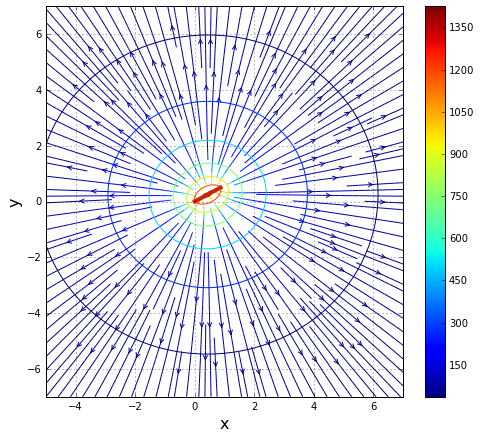

In [11]:
# plots the streamlines
%matplotlib inline

size = 8
pyplot.figure(figsize=(size, size-1))
pyplot.title('Streamline field')
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.plot((0+origin_new_x,L1*math.cos(alpha)+origin_new_x),(0+origin_new_y,L1*math.sin(alpha)+origin_new_y), color='#CD2305', linewidth=4) #red source line

#stream =pyplot.streamplot(X, Y, u, v, color=numpy.sqrt(u**2+v**2),cmap='jet',density=2, linewidth=1, arrowsize=1, arrowstyle='->') #streamline
stream =pyplot.streamplot(X, Y, u1, v1, color=numpy.sqrt(u1**2+v1**2),cmap='jet',density=2, linewidth=1, arrowsize=1, arrowstyle='->') #streamline

cbar=pyplot.colorbar(orientation='vertical')
equipotential=pyplot.contour(X, Y, p1, extend='both')

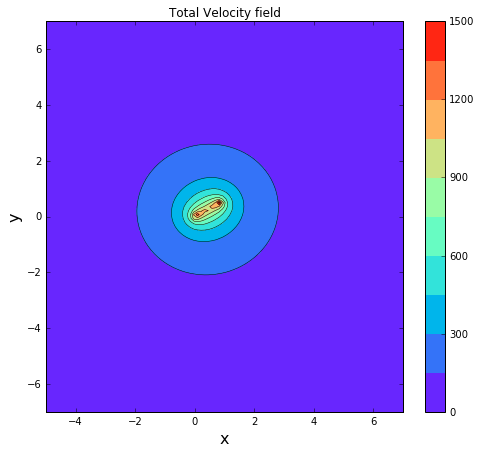

In [14]:
size = 8
pyplot.figure(figsize=(size, size-1))
pyplot.title('Velocity field')
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)

Vtotal= numpy.sqrt(u1**2+v1**2)

pyplot.contour(X, Y, Vtotal, 10, linewidths=0.5, colors='k')
pyplot.contourf(X, Y, Vtotal, 10, cmap='rainbow')
pyplot.colorbar()  # draw colorbar